### Project Title


Developing a Sentiment-Driven Product Recommendation and Sales Insight for E Commerce Using Machine Learning and Visualization Dashboard.

### Dataset Description

 This dataset is having two files of Amazon Product's Reviews and metadata as per their details listed on the official website of Amazon for the Amazon Reviews’23.

Datasource: https://amazon-reviews-2023.github.io/main.html

### 1. Data Exploration


##### Import Required Libraries

 Firstly, we need to import all necessary require libraries before start the project.

In [127]:
# improt require liraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


##### Upload dataset files

 Next step, need to upload dataset files. The dataset type is the csv file. In this step, the dataset is imported from the data folder. This folder contains two dataset files like review_Health_and_Personal_Care.csv and meta_Health_and_Personal_Care.csv.


In [128]:
# Load product reviews dataset file
reviews = pd.read_csv('data/raw/review_Health_and_Personal_Care.csv')

# Load product metadata dataset file
metadata = pd.read_csv('data/raw/meta_Health_and_Personal_Care.csv')


##### Explore the Datasets

In [129]:
# explore the datasets

# View the first few rows
reviews.head()
# Check the structure and data types
reviews.info()

# View the first few rows
metadata.head()
# Check the structure and data types
metadata.info()

reviews['rating'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494121 entries, 0 to 494120
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   rating             494121 non-null  int64 
 1   title              493996 non-null  object
 2   text               493980 non-null  object
 3   images             494121 non-null  object
 4   asin               494121 non-null  object
 5   parent_asin        494121 non-null  object
 6   user_id            494121 non-null  object
 7   timestamp          494121 non-null  object
 8   helpful_vote       494121 non-null  int64 
 9   verified_purchase  494121 non-null  bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 34.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60293 entries, 0 to 60292
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   main_category    60293 non-null  object 
 1   t

rating
5    301713
1     69564
4     57000
3     36949
2     28895
Name: count, dtype: int64

-head() shows the first few rows of the reviews dataset.

-info() displays data types and null values.

-Similar exploration for the metadata dataset.

-Displays the distribution of rating values in the review data.



##### Getting the Dimensions of the Datasets

In [130]:
# Get the dimension of the data for review dataset
review = reviews.shape

print(f"Number of rows for reviews dataset: {review[0]} \n Number of columns for reviews dataset: {review[1]} ")

# Get the dimension of the data for metadata dataset
meta = metadata.shape

print(f"Number of rows for metadata dataset: {meta[0]} \n Number of columns for metadata dataset: {meta[1]} ")



Number of rows for reviews dataset: 494121 
 Number of columns for reviews dataset: 10 
Number of rows for metadata dataset: 60293 
 Number of columns for metadata dataset: 14 


-Prints out the dimensionality for a quick overview.

## 2. Data Preprocessing

Data Cleaning: The collected data for each stock was subject to a cleaning process where all null values, missing values and inconsistencies were addressed.
Before start use the dataset for this project, duplicated row should be checked.

### 2.1 Data Cleaning for review dataset


This step ensures the review dataset is clean and reliable by identifying missing values and duplicate records.

##### Check for Missing Values

Missing values per column:
 rating                 0
title                125
text                 141
images                 0
asin                   0
parent_asin            0
user_id                0
timestamp              0
helpful_vote           0
verified_purchase      0
dtype: int64


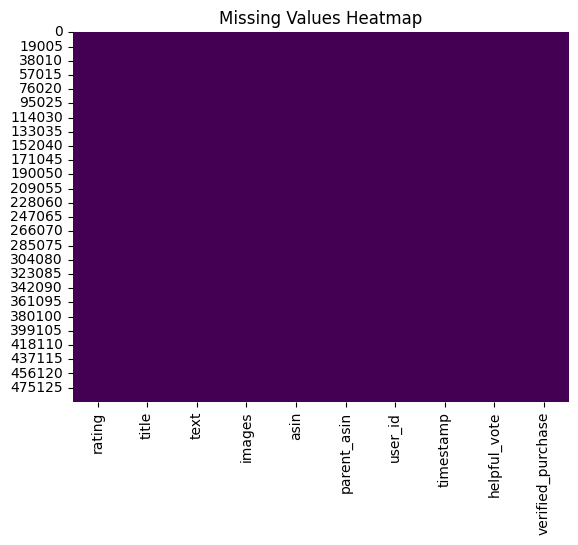

In [131]:
# Check for missing values
print("Missing values per column:\n", reviews.isnull().sum())



# Visualize missing values
sns.heatmap(reviews.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

-Prints the number of missing entries for each column in the reviews DataFrame.

-Visualizes missing data using a heatmap.

-The color coding helps easily identify which columns contain nulls.

##### Check for Duplicated Rows

In [132]:
# Check duplicated row
# Identify duplicate rows
duplicates = reviews[reviews.duplicated()]

# Display the duplicate rows
print(duplicates)

# Count the number of duplicate rows
num_duplicates = reviews.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

        rating                                 title  \
806          1  Buyer Beware - Total Bate and Switch   
3658         5                       Superb quality!   
4003         5                    Cleans wonderfully   
4499         5                       Great product!!   
4625         5                        Bathroom Scale   
...        ...                                   ...   
493415       5                Good Quality and price   
493514       4   Overall I am happy with my purchase   
493523       5  Very comfortable silicone ear plugs.   
493746       1                  Leaky, Low pressure.   
494000       2                        Dislike blades   

                                                     text images        asin  \
806     I've taken this product for years and I've wat...     []  B006M3ZVLC   
3658    Very fast delivery!<br /><br />Strong and dura...     []  B07Q35QD56   
4003                     It cleaned my shower wonderfully     []  B01AVKF06W   
4499   

-Identifies and displays duplicate rows that might skew analysis or model training.

-Counts the total number of duplicates for removal if needed.



#### Data Handling

This step will drop unnecessary columns before handling missing Value. 

In [133]:
# Drop unnecessary columns with any missing value
reviews = reviews.drop(columns=["images", "timestamp"])  # 'images' is empty, 'timestamp' not used for now
print(f"Well done, dropping for unnecessary columns")

Well done, dropping for unnecessary columns


We need to drop for missing data to get useful dataset.

In [134]:
# Drop Missing reviews
reviews.dropna(subset=['text'], inplace=True)

# Drop misssing title
reviews.dropna(subset=['title'], inplace=True)

print(f"Missing value handling is complete.")


Missing value handling is complete.


In [135]:
# Remove duplicate rows
cleaned_reviews_df = reviews.drop_duplicates()
print(f"Removing duplicate value is complete.")


Removing duplicate value is complete.


In [136]:
# Double-check
print(f"Missing values now: {cleaned_reviews_df.isnull().sum()}")
print(f"Number of duplicate rows now: {cleaned_reviews_df.duplicated().sum()}")

Missing values now: rating               0
title                0
text                 0
asin                 0
parent_asin          0
user_id              0
helpful_vote         0
verified_purchase    0
dtype: int64
Number of duplicate rows now: 0


In [137]:
# show length of rows and columns from dataset after cleaning
print(f"Rows length: {len(cleaned_reviews_df)}")
print(f"Columns length: {cleaned_reviews_df.columns}")

Rows length: 488776
Columns length: Index(['rating', 'title', 'text', 'asin', 'parent_asin', 'user_id',
       'helpful_vote', 'verified_purchase'],
      dtype='object')


In [138]:
# Check column data types
print(cleaned_reviews_df.dtypes)

rating                int64
title                object
text                 object
asin                 object
parent_asin          object
user_id              object
helpful_vote          int64
verified_purchase      bool
dtype: object


This step will cleaning the reviews text.

In [139]:
# Cleaning the reviews text
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)  # remove punctuation and symbols
    return text

cleaned_reviews_df['cleaned_text'] = cleaned_reviews_df['text'].apply(clean_text)


C:\Users\User\AppData\Local\Temp\ipykernel_24056\1925675872.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_reviews_df['cleaned_text'] = cleaned_reviews_df['text'].apply(clean_text)


The value of dataset should be checked after the data handling.

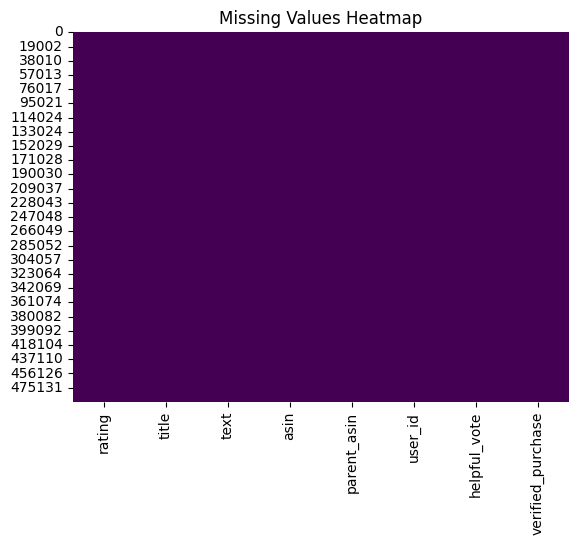

In [140]:
#Checking for null values
cleaned_reviews_df.isnull().sum()

# Visualize missing values
sns.heatmap(reviews.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

##### Show Length of Rows and Column

In [141]:
# show length of rows and columns from dataset after cleaning
print(f"Rows length: {len(cleaned_reviews_df)}")
print(f"Columns length: {cleaned_reviews_df.columns}")

Rows length: 488776
Columns length: Index(['rating', 'title', 'text', 'asin', 'parent_asin', 'user_id',
       'helpful_vote', 'verified_purchase', 'cleaned_text'],
      dtype='object')


-Displays the number of rows and the list of column names in the cleaned dataset.

-Helps confirm that the dataset structure is as expected.

Finally, we will save the cleaning review dataset.

In [142]:
# save cleaned review dataset 
cleaned_reviews_df.to_csv("data/cleaned_reviews_df.csv", index=False)


### 2.2 Data Cleaning for metadata dataset

This section performs essential data cleaning on the product metadata file to ensure high-quality and usable data for analysis and modeling.

Before cleaning the metadata, this section performs diagnostic checks to understand its structure, missing values, and duplicates.

##### Dataset Structure

In [143]:
# Check structure
metadata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60293 entries, 0 to 60292
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   main_category    60293 non-null  object 
 1   title            60288 non-null  object 
 2   average_rating   60293 non-null  float64
 3   rating_number    60293 non-null  int64  
 4   features         60293 non-null  object 
 5   description      60293 non-null  object 
 6   price            10536 non-null  float64
 7   images           60293 non-null  object 
 8   videos           60293 non-null  object 
 9   store            57938 non-null  object 
 10  categories       60293 non-null  object 
 11  details          60293 non-null  object 
 12  parent_asin      60293 non-null  object 
 13  bought_together  0 non-null      float64
dtypes: float64(3), int64(1), object(10)
memory usage: 6.4+ MB


-Displays the number of non-null values per column.

-Shows column names and data types.

-Helps identify potential type issues or major gaps.

##### Identify Missing Values

Missing values per column:
 main_category          0
title                  5
average_rating         0
rating_number          0
features               0
description            0
price              49757
images                 0
videos                 0
store               2355
categories             0
details                0
parent_asin            0
bought_together    60293
dtype: int64


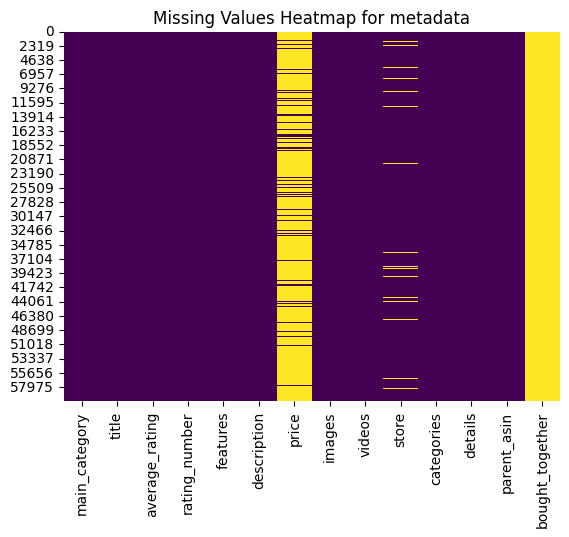

In [144]:
# Check for missing values
metadata.isnull().sum()
print("Missing values per column:\n", metadata.isnull().sum())

# Visualize missing values
sns.heatmap(metadata.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap for metadata")
plt.show()


-Shows the count of missing entries for each column.

-Visualizes missing values using a heatmap.

-Helpful for detecting patterns or widespread null columns.

##### Check for Duplicates

In [145]:
# Check duplicated row
# Identify duplicate rows
duplicates = metadata[metadata.duplicated()]

# Display the duplicate rows
print(duplicates)

# Count the number of duplicate rows
num_duplicates = metadata.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Empty DataFrame
Columns: [main_category, title, average_rating, rating_number, features, description, price, images, videos, store, categories, details, parent_asin, bought_together]
Index: []
Number of duplicate rows: 0


-Extracts and prints all duplicate rows.

-Displays the total count of duplicate records.

#### Data Handling

This section prepares the raw metadata for analysis by removing irrelevant fields, handling missing values, and eliminating duplicates.

##### Drop Columns

We will start data handling by dropping unnecessary column.

In [146]:
# Drop unnecessary column for metadata
metadata_df = metadata.drop(columns=[
    'features', 'description', 'images', 'videos', 'categories', 'bought_together'
])

print(f"Dropping unnecessary columns is complete.")


Dropping unnecessary columns is complete.


-Removes fields that are not essential for recommendation or sentiment scoring.

-Helps reduce memory usage and processing time by keeping only the relevant data.

In [147]:
import re

# Strip {, }, and keys
def clean_details(text):
    return re.sub(r"[{}']", "", re.sub(r"\s*\w+:\s*", "", str(text)))

metadata_df['details'] = metadata_df['details'].apply(clean_details)


##### Handle Missing Values

This step is handling missing value for product data.

In [148]:
# Drop and Fill for missing value data
# Drop rows where essential info is missing
metadata_df = metadata_df.dropna(subset=['title'])

# Fill missing price with median (to avoid dropping useful rows)
metadata_df['price'] = metadata_df['price'].fillna(metadata_df['price'].median())

# Optional: fill missing store or title with placeholder
metadata_df['store'] = metadata_df['store'].fillna('Unknown')

print(f"Missing value handling complete: kept all rows with filled price and store.")


Missing value handling complete: kept all rows with filled price and store.


-Drops rows where key fields like title or price are missing.

-Fills missing values in the store column with a placeholder ('Unknown').

-Ensures the dataset is clean enough for analysis and modeling.

##### Remove Duplicate Rows

In [149]:
# Remove duplicate rows
metadata_df = metadata_df.drop_duplicates()
print(f"Removing duplicate value is complete.")

Removing duplicate value is complete.


-Eliminates repeated rows from the dataset to prevent distortion of results or duplicate recommendations.

##### Convert Data Types

In [150]:
# Convert data type 
metadata_df['price'] = pd.to_numeric(metadata_df['price'], errors='coerce')
metadata_df['average_rating'] = pd.to_numeric(metadata_df['average_rating'], errors='coerce')
metadata_df['rating_number'] = pd.to_numeric(metadata_df['rating_number'], errors='coerce')


-Converts string or object-type columns (price, average_rating, rating_number) into numeric format.

-errors='coerce' ensures that invalid entries become NaN instead of throwing errors.

-This conversion is crucial for calculations, analysis, and model input.

##### Filter and Rename Columns

In [151]:
# Filter and Rename Columns
cleaned_metadata_df = metadata_df[[
    'parent_asin', 'main_category', 'title', 'average_rating', 'rating_number', 'price', 'store', 'details'
]]
cleaned_metadata_df.rename(columns={'title': 'product_title'}, inplace=True)


cleaned_metadata_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 60288 entries, 0 to 60292
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   parent_asin     60288 non-null  object 
 1   main_category   60288 non-null  object 
 2   product_title   60288 non-null  object 
 3   average_rating  60288 non-null  float64
 4   rating_number   60288 non-null  int64  
 5   price           60288 non-null  float64
 6   store           60288 non-null  object 
 7   details         60288 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.1+ MB


-Selects only the relevant columns needed for the project:

-parent_asin, main_category, title, average_rating, rating_number, price, and store

-Renames the title column to product_title for clarity and consistency.

##### Final Checks

In [152]:
# Double-check
print(f"Summary of data types: {cleaned_metadata_df.info()}")
print(f"Missing values now: {cleaned_metadata_df.isnull().sum()}")
print(f"Number of duplicate rows now: {cleaned_metadata_df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
Index: 60288 entries, 0 to 60292
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   parent_asin     60288 non-null  object 
 1   main_category   60288 non-null  object 
 2   product_title   60288 non-null  object 
 3   average_rating  60288 non-null  float64
 4   rating_number   60288 non-null  int64  
 5   price           60288 non-null  float64
 6   store           60288 non-null  object 
 7   details         60288 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.1+ MB
Summary of data types: None
Missing values now: parent_asin       0
main_category     0
product_title     0
average_rating    0
rating_number     0
price             0
store             0
details           0
dtype: int64
Number of duplicate rows now: 0


-Provides a summary of data types and non-null counts.

-Verifies that missing values and duplicates have been handled properly.

##### Show Length of Rows and Column

In [153]:
# show length of rows and columns from dataset after cleaning
print(f"Rows length: {len(cleaned_metadata_df)}")
print(f"Columns length: {cleaned_metadata_df.columns}")

Rows length: 60288
Columns length: Index(['parent_asin', 'main_category', 'product_title', 'average_rating',
       'rating_number', 'price', 'store', 'details'],
      dtype='object')


-Displays the number of rows and the list of column names in the cleaned dataset.

-Helps confirm that the dataset structure is as expected.

##### Check Data Type

In [154]:
# Check column data types
print(cleaned_metadata_df.dtypes)

parent_asin        object
main_category      object
product_title      object
average_rating    float64
rating_number       int64
price             float64
store              object
details            object
dtype: object


-Shows the data type for each column.

-Confirms that numeric fields like price, rating, and rating_number are properly converted to float or int.



##### Save the Cleaned Metadata

In [155]:
# save cleaned metadata dataset
cleaned_metadata_df.to_csv("data/cleaned_metadata_df.csv", index=False)


-Exports the cleaned metadata_df to a new CSV file.

-Sets index=False to avoid writing row numbers as a separate column.